## Deliverable 3: Optimize the Model

## Load dataset and Preprocess data

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("datasets/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN', 'NAME'], axis=1, inplace=True)

In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

<AxesSubplot:ylabel='Density'>

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

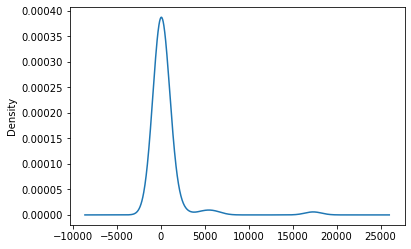

In [10]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df.drop(application_cat, axis=1, inplace=True)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Make copy of application_df dataframe for optimizations to model
application_df_copy = application_df.copy()

## Optimize model to achieve 75% or greater accuracy

In [46]:
def split_preprocessed_data():
    """
    Description: Split our preprocessed data into our features and target arrays
    
    returns: numpy arrays of X and y training and test values
    """
    y = application_df.IS_SUCCESSFUL.values
    X = application_df.drop(columns=['IS_SUCCESSFUL'], axis=1).values

    # Split the preprocessed data into a training and testing dataset
    X_test, X_train, y_test, y_train = train_test_split(X, y, random_state=78)
    
    return X_test, X_train, y_test, y_train

In [47]:
def standardize_data():
    """
    Create a StandardScaler instances
    """
    
    scaler = StandardScaler()

    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)

    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

### 1. Check for Outliers in ASK_AMT column

In [16]:
import matplotlib.pyplot as plt

In [17]:
%matplotlib inline

In [18]:
application_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  float64
 4   APPLICATION_TYPE_T10          34299 non-null  float64
 5   APPLICATION_TYPE_T19          34299 non-null  float64
 6   APPLICATION_TYPE_T3           34299 non-null  float64
 7   APPLICATION_TYPE_T4           34299 non-null  float64
 8   APPLICATION_TYPE_T5           34299 non-null  float64
 9   APPLICATION_TYPE_T6           34299 non-null  float64
 10  APPLICATION_TYPE_T7           34299 non-null  float64
 11  APPLICATION_TYPE_T8           34299 non-null  float64
 12  AFFILIATION_CompanySponsored  34299 non-null  float64
 13  A

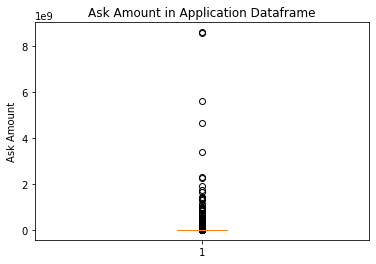

In [19]:
import matplotlib.pyplot as plt

# outlier plot
ask_amts = list(application_df_copy['ASK_AMT'])
fig1, ax1 = plt.subplots()
ax1.set_title('Ask Amount in Application Dataframe')
ax1.set_ylabel('Ask Amount')
ax1.boxplot(ask_amts)
plt.show()

In [20]:
import numpy as np

In [21]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_amts,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

# Store the potential outliers
potential_outliers = [ask_amt for ask_amt in ask_amts if ask_amt < lower_bound or ask_amt > upper_bound]

In [22]:
sorted(potential_outliers,reverse=True)[:5]

[8597806340, 8556638692, 5591584994, 4653011914, 3391919220]

In [23]:
sorted(potential_outliers,reverse=False)[:5]

[11886, 11899, 11901, 11912, 11917]

#### Remove top 3 outliers exceeding upper bound quartile

In [33]:
outlier_upper_mask = application_df_copy['ASK_AMT'] > 4653011914

In [42]:
application_df = application_df[~outlier_upper_mask]

In [45]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
# Split preprocessed data into training and test
X_test, X_train, y_test, y_train = split_preprocessed_data()

In [49]:
# Standardize data for model
X_train_scaled, X_test_scaled = standardize_data()

In [50]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [52]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
268/268 [==============================] - 1s 1ms/step - loss: 0.5994 - accuracy: 0.6983
Epoch 2/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5665 - accuracy: 0.7223
Epoch 3/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5618 - accuracy: 0.7272
Epoch 4/100
268/268 [==============================] - 0s 996us/step - loss: 0.5573 - accuracy: 0.7270
Epoch 5/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7268
Epoch 6/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5528 - accuracy: 0.7293
Epoch 7/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5508 - accuracy: 0.7303
Epoch 8/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5511 - accuracy: 0.7326
Epoch 9/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5497 - accuracy: 0.7292
Epoch 10/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5483 - accu

In [53]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5722 - accuracy: 0.7265 - 646ms/epoch - 803us/step
Loss: 0.5721850991249084, Accuracy: 0.7264598608016968


### 2. Remove STATUS and SPECIAL_CONSIDERATIONS columns from dataset

In [55]:
application_df.drop(['STATUS', 'SPECIAL_CONSIDERATIONS_N', 'SPECIAL_CONSIDERATIONS_Y'], axis=1, inplace=True)

In [56]:
application_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       

In [57]:
# Split preprocessed data into training and test
X_test, X_train, y_test, y_train = split_preprocessed_data()

In [58]:
# Standardize data for model
X_train_scaled, X_test_scaled = standardize_data()

In [59]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 80)                3280      
                                                                 
 dense_4 (Dense)             (None, 30)                2430      
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,741
Trainable params: 5,741
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [61]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
268/268 [==============================] - 1s 1ms/step - loss: 0.5953 - accuracy: 0.7013
Epoch 2/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5637 - accuracy: 0.7235
Epoch 3/100
268/268 [==============================] - 0s 981us/step - loss: 0.5567 - accuracy: 0.7275
Epoch 4/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5556 - accuracy: 0.7271
Epoch 5/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.7282
Epoch 6/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.7284
Epoch 7/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5501 - accuracy: 0.7309
Epoch 8/100
268/268 [==============================] - 0s 992us/step - loss: 0.5470 - accuracy: 0.7317
Epoch 9/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.7313
Epoch 10/100
268/268 [==============================] - 0s 974us/step - loss: 0.5464 - 

In [62]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5729 - accuracy: 0.7263 - 599ms/epoch - 745us/step
Loss: 0.5728956460952759, Accuracy: 0.7263432145118713


### 3. Add more neurons to first hidden layer

In [63]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               4100      
                                                                 
 dense_7 (Dense)             (None, 30)                3030      
                                                                 
 dense_8 (Dense)             (None, 1)                 31        
                                                                 
Total params: 7,161
Trainable params: 7,161
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [65]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
268/268 [==============================] - 1s 1ms/step - loss: 0.5928 - accuracy: 0.7001
Epoch 2/100
268/268 [==============================] - 0s 931us/step - loss: 0.5641 - accuracy: 0.7233
Epoch 3/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5586 - accuracy: 0.7266
Epoch 4/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7289
Epoch 5/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7278
Epoch 6/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5506 - accuracy: 0.7306
Epoch 7/100
268/268 [==============================] - 0s 997us/step - loss: 0.5478 - accuracy: 0.7313
Epoch 8/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7320
Epoch 9/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5463 - accuracy: 0.7315
Epoch 10/100
268/268 [==============================] - 0s 1ms/step - loss: 0.5467 - ac

In [66]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5737 - accuracy: 0.7255 - 598ms/epoch - 744us/step
Loss: 0.5737248063087463, Accuracy: 0.7254878878593445


### 4. Train model for 200 epochs

In [67]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 100)               4100      
                                                                 
 dense_10 (Dense)            (None, 30)                3030      
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 7,161
Trainable params: 7,161
Non-trainable params: 0
_________________________________________________________________


In [68]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
# Train the model
nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
268/268 [==============================] - 1s 1ms/step - loss: 0.5909 - accuracy: 0.7059
Epoch 2/200
268/268 [==============================] - 0s 1ms/step - loss: 0.5652 - accuracy: 0.7221
Epoch 3/200
268/268 [==============================] - 0s 990us/step - loss: 0.5576 - accuracy: 0.7223
Epoch 4/200
268/268 [==============================] - 0s 1ms/step - loss: 0.5555 - accuracy: 0.7275
Epoch 5/200
268/268 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.7291
Epoch 6/200
268/268 [==============================] - 0s 1ms/step - loss: 0.5511 - accuracy: 0.7298
Epoch 7/200
268/268 [==============================] - 0s 1ms/step - loss: 0.5512 - accuracy: 0.7296
Epoch 8/200
268/268 [==============================] - 0s 1ms/step - loss: 0.5485 - accuracy: 0.7313
Epoch 9/200
268/268 [==============================] - 0s 1ms/step - loss: 0.5472 - accuracy: 0.7317
Epoch 10/200
268/268 [==============================] - 0s 981us/step - loss: 0.5468 - ac

In [70]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

804/804 - 1s - loss: 0.5909 - accuracy: 0.7261 - 624ms/epoch - 776us/step
Loss: 0.590876042842865, Accuracy: 0.7261099219322205
